# Training eines MLPs auf MNIST

## Setup

### Einbinden von Paketen

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

np.__version__, pd.__version__, sklearn.__version__

('1.23.4', '1.5.0', '1.1.3')

## 1. Spielzeugdatensatz

### Aufgabe 1.1

Erzeugen von 200 zweidimensionalen Trainingsdatenpunkten mithilfe einer Gleichverteilung über dem Gebiet `[-6, 6] x [-6, 6]`:

In [133]:
X_train = np.random.uniform(-6,6,(200,2))

### Aufgabe 1.2

Vergabe der Klassenlabels 0 und 1:

In [134]:
def classify_data(data):
  labels = []
  for item in data:
    if (item[0] < 0 and item[1] < 0) or (item[0] > 0 and item[1] > 0):
      labels.append(0)
    else:
      labels.append(1)
  return labels

y_train = classify_data(X_train)

### Aufgabe 1.3

Erzeugen eines gleich großen Testdatensatzes:

In [135]:
X_test = np.random.uniform(-6,6,(200,2))
y_test = classify_data(X_test)

Darstellung der Trainings- und Testdatensätze als Scatterplot:

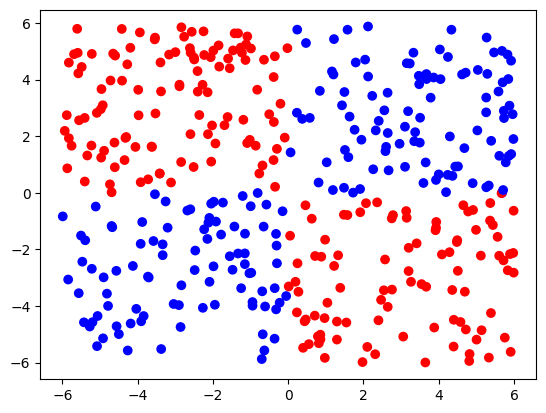

In [136]:
def get_colors(data):
  colors = []
  for y in data:
    if y == 0:
      colors.append('b')
    if y == 1:
      colors.append('r')
  return colors

plt.scatter(X_train[:,0], X_train[:,1], c=get_colors(y_train))
plt.scatter(X_test[:,0], X_test[:,1], c=get_colors(y_test))

### Aufgabe 1.4

Der Gewichtsvektor hat die Form `(2, 1)` weil wir 2 eindimensionale Eingangswerte haben.

In [137]:
weight_1 = np.array([1, 0])
weight_2 = np.array([0, 1])
weights = np.array([weight_1, weight_2])
weight_1.shape

(2,)

### Aufgabe 1.5

Berechnen der Entscheidungsfunktion der beiden Neuronen:

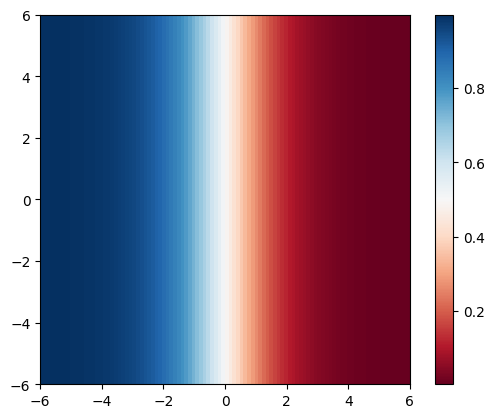

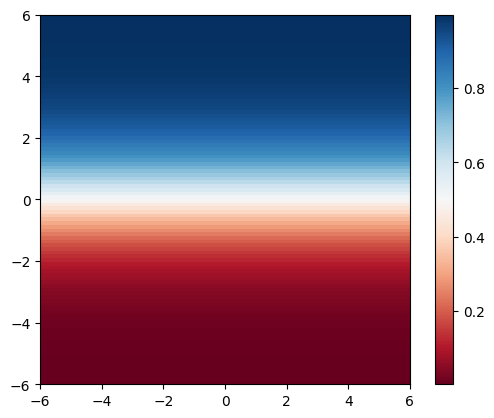

In [138]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x, y = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
sigmoid_x = sigmoid(-x)
sigmoid_y = sigmoid(-y)

plt.imshow(sigmoid_x, extent=(-6, 6, -6, 6), cmap='RdBu')
plt.colorbar()
plt.show()
plt.imshow(sigmoid_y, extent=(-6, 6, -6, 6), cmap='RdBu')
plt.colorbar()
plt.show()

### Aufgabe 1.6

Berechnung des Outputs der Eingangsneuronen:

In [139]:
def calc_neuron_output(w, X):
    return sigmoid(np.sum(w.T * X))

neuron_output_train = np.zeros((2, len(X_train)))
for index, x in enumerate(X_train):
    neuron_output_train[0, index] = calc_neuron_output(weights[0], x)
    neuron_output_train[1, index] = calc_neuron_output(weights[1], x)

neuron_output_test = np.zeros((2, len(X_test)))
for index, x in enumerate(X_test):
    neuron_output_test[0, index] = calc_neuron_output(weights[0], x)
    neuron_output_test[1, index] = calc_neuron_output(weights[1], x)

neuron_output_train[:,:5]

array([[0.23016926, 0.89112919, 0.27939037, 0.01278914, 0.2466179 ],
       [0.4722759 , 0.00430613, 0.02065122, 0.76090449, 0.99474386]])

In [140]:
gitter_output = np.zeros((2, 100*100))
step = 12/100
index = 0
for x in np.arange(-6, 6, step):
    for y in np.arange(-6, 6, step):
        input = np.array([x, y])
        gitter_output[0, index] = calc_neuron_output(weights[0], input)
        gitter_output[1, index] = calc_neuron_output(weights[1], input)
        index += 1

gitter_output

array([[0.00247262, 0.00247262, 0.00247262, ..., 0.997213  , 0.997213  ,
        0.997213  ],
       [0.00247262, 0.002787  , 0.00314121, ..., 0.99645971, 0.99685879,
        0.997213  ]])

## 2. Training eines MLPs auf den Spielzeugdaten

### Aufgabe 2.1